# Interlab from iGEM 2015


In [46]:
%matplotlib inline
import pylab as pl
from math import sqrt
import sys

# importing platemate
sys.path.insert(0, '../src')
import platemate

You first need to map each column in your plate to a colony or a control.

In [81]:
ColumnNames = {
    'C' : "Dev1",
    'D' : "Dev2",
    'E' : "Dev3"
    }

controlNames = {
    'A' : "LB",
    'B' : "LB+Cam",
    'F' : "+control",
    'G' : "-control1",
    'H' : "-control2"
    }

Then we create an object PlateMate

In [118]:
reload(platemate)
pm = platemate.PlateMate(colonyNames = ColumnNames, controlNames = controlNames)

aaa

In [119]:
print pm.getColonyNames()
print pm.getControlNames()

['Dev1', 'Dev3', 'Dev2']
['LB', '-control2', 'LB+Cam', '-control1', '+control']


Indexing and reading all files from the spectrometer.

In [120]:
pm.findFiles("medida")

print 'reading fluorescence...'
pm.readFluorescence()
print 'reading optical density...'
pm.readOpticalDensity()

reading fluorescence...
reading optical density...


Now the object pm has all information about plate readings. For instance, we can get a summary from one of the well sets defined before. As an example, let's try "LB".

In [121]:
pm.summary("LB")

,A01,A02,A03,A04,A05,A06,A07,A08,A09
0,896.879,924.144,899.629,796.180,936.492,826.367,759.291,792.928,946.623
1,946.583,938.596,928.959,790.242,946.989,838.949,777.353,790.383,963.707
2,694.778,774.716,718.264,533.280,735.652,606.997,629.488,703.695,852.307


Because the file also contained information about the temperature at the time of the reading, platemate will also sotre it for any possible analysis.

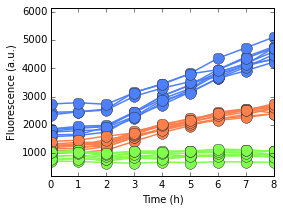

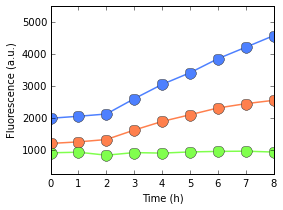

In [122]:
pl.figure(figsize=(4,3))
pm.plotIt(["Dev1","Dev2","Dev3"])
pl.show()

pl.figure(figsize=(4,3))
pm.plotMean(["Dev1","Dev2","Dev3"])
pl.show()

In [123]:
pm.compareFluorescence("LB","Dev1")

(0.0, 4.4054724961400581e-28)

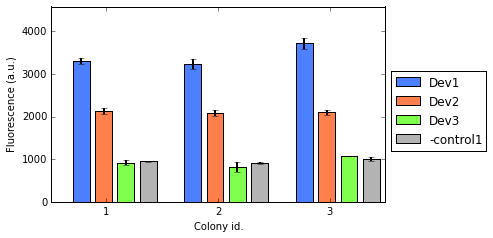

In [124]:
pl.figure(figsize=(6,3.5))
pm.plotBars(["Dev1","Dev2","Dev3","-control1"], 5)
pl.show()